# MIMIC-II IAC Introduction

This tutorial explores the **M**ultiparameter **I**ntelligent **M**onitoring in **I**ntensive **C**are II (**MIMIC-II**) **I**ndwelling **A**rterial **C**atheters (**IAC**) dataset, as subset derived from MIMIC-II, the publicly-accessible critical care database. The database was created for the purpose of a case study in the book ["Secondary Analysis of Electronic Health Records"](https://link.springer.com/book/10.1007/978-3-319-43742-2), published by Springer in 2016. In particular, the MIMIC-II IAC dataset was used throughout Chapter 16 (Data Analysis) by Raffa J. et al. to investigate the effectiveness of indwelling arterial catheters in hemodynamically stable patients with respiratory failure for mortality outcomes. 

More details on the dataset can be found [here](https://physionet.org/content/mimic2-iaccd/1.0/)

Overview of the MIMIC-II database:

![](./images/MIMIC-II-database-structure.png)
<img src="./images/MIMIC-II-database-structure.png" width="800" height=auto/>

## Importing ehrapy and setting plotting parameters

In [1]:
import ehrapy as ep
import seaborn as sns
import matplotlib.pyplot as plt

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
ep.print_versions()

-----
ehrapy              0.4.0
rich                NA
session_info        1.0.0
-----
Levenshtein         0.20.9
PIL                 9.5.0
anndata             0.8.0
anyio               NA
argcomplete         NA
arrow               1.2.3
astor               0.8.1
asttokens           NA
attr                22.2.0
autograd            NA
autograd_gamma      NA
babel               2.12.1
backcall            0.2.0
backports           NA
bs4                 4.12.1
cachetools          5.3.0
category_encoders   2.6.0
certifi             2022.12.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
comm                0.1.3
cryptography        39.0.0
cvxopt              1.3.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
db_dtypes           1.1.1
debugpy             1.6.7
decorator           5.1.1
deep_translator     1.9.1
deepl               1.14.0
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
fhiry               3.0.0
formulaic           0.5.2
fqdn                NA
future              0.18.3
google              NA
graphlib            NA
grpc                1.53.0
grpc_status         NA
h5py                3.8.0
html5lib            1.1
idna                3.4
igraph              0.10.4
interface_meta      1.3.0
ipykernel           6.22.0
ipython_genutils    0.2.0
ipywidgets          8.0.6
isoduration         NA
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonpointer         2.3
jsonschema          4.17.3
jupyter_events      0.6.3
jupyter_server      2.3.0
jupyterlab_server   2.19.0
kiwisolver          1.4.4
leidenalg           0.9.1
lifelines           0.27.4
llvmlite            0.39.1
markupsafe          2.1.2
matplotlib          3.7.1
missingno           0.5.2
mpl_toolkits        NA
mudata              0.2.1
natsort             8.3.1
nbformat            5.7.3
numba               0.56.4
numpy               1.23.5
packaging           23.0
pandas              1.5.3
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.2.0
prometheus_client   NA
prompt_toolkit      3.0.38
psutil              5.9.4
ptyprocess          0.7.0
pure_eval           0.2.2
pyarrow             11.0.0
pydantic            1.10.7
pydev_ipython       NA
pydevconsole        NA
pydevd              2.9.5
pydevd_file_utils   NA
pydevd_plugins      NA
pydevd_tracing      NA
pygments            2.14.0
pyhpo               3.1.4
pyparsing           3.0.9
pypi_latest         0.1.2
pyrsistent          NA
pythonjsonlogger    NA
pytz                2023.3
questionary         1.10.0
rapidfuzz           2.15.0
requests            2.28.2
rfc3339_validator   0.1.4
rfc3986_validator   0.1.1
ruamel              NA
scanpy              1.9.3
scipy               1.9.3
seaborn             0.12.2
send2trash          NA
setuptools          67.6.1
six                 1.16.0
sklearn             1.2.2
sniffio             1.3.0
soupsieve           2.4
sphinxcontrib       NA
stack_data          0.6.2
statsmodels         0.13.5
texttable           1.6.7
thefuzz             0.19.0
threadpoolctl       3.1.0
tornado             6.2
tqdm                4.65.0
traitlets           5.9.0
typing_extensions   NA
uri_template        NA
urllib3             1.26.15
wcwidth             0.2.6
webcolors           1.11.1
webencodings        0.5.1
websocket           1.5.1
wrapt               1.15.0
yaml                6.0
zmq                 25.0.0
zoneinfo            NA
-----
IPython             8.12.0
jupyter_client      8.0.3
jupyter_core        5.2.0
jupyterlab          3.6.1
notebook            6.5.2
-----
Python 3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]
Linux-6.2.9-arch1-1-x86_64-with-glibc2.37
-----
Session information updated at 2023-04-07 11:49

In [4]:
ep.settings.set_figure_params(figsize=(4, 4))

## MIMIC-II dataset preparation

ehrapy offers several [datasets](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#data) that can be used out of the box.
Let's get the MIMIC-II IAC dataset. It is also possible to get the MIMIC-II dataset already pre-encoded by setting the encoded flag to 'True'. ehrapy's default encoding is a simple one-hot encoding in this case.

In [5]:
adata = ep.dt.mimic_2(encoded=False)

2023-04-07 11:49:39,777 - root INFO - Added all columns to `obs`.
2023-04-07 11:49:39,793 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `1776` x `46`.


In [6]:
adata

AnnData object with n_obs × n_vars = 1776 × 46
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

The MIMIC-II dataset has 1776 patients as described above with 46 features.

The **service_unit** and **day_icu_intime** variables are categorical. We will therefore encode them first with one-hot encoding. This ensures that no ordering is preserved for the respective features. ehrapy also offers other [encoding](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#encoding) functions.

In [7]:
adata = ep.pp.encode(
    adata, encodings={"one_hot_encoding": ["service_unit", "day_icu_intime"]}
)

2023-04-07 11:49:39,822 - root INFO - The original categorical values `['service_unit', 'day_icu_intime']` were added to uns.


Output()

2023-04-07 11:49:39,850 - root INFO - Updated the original layer after encoding.
2023-04-07 11:49:39,859 - root INFO - Added `['service_unit', 'day_icu_intime']` columns to `X`.
2023-04-07 11:49:39,866 - root INFO - The original categorical values `['service_unit', 'day_icu_intime']` were added to obs.


In [8]:
adata

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'numerical_columns', 'non_numerical_columns', 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

After one-hot encoding the two columns we've expanded our matrix from 46 to 54 features.
Let's verify that we've indeed encoded all columns and are ready to proceed.

In [9]:
ep.ad.type_overview(adata)

Variable names for AnnData object with 1776 obs and 54 vars
╠══ 🔐 Encoded variables
║   ╠══ service_unit -> 3 categories; one hot encoded; original data type: string
║   ╚══ day_icu_intime -> 7 categories; one hot encoded; original data type: string
╚══ 🔓 Unencoded variables
    ╠══ aline_flg -> data type: floating
    ╠══ icu_los_day -> data type: floating
    ╠══ hospital_los_day -> data type: floating
    ╠══ age -> data type: floating
    ╠══ gender_num -> data type: floating
    ╠══ weight_first -> data type: floating
    ╠══ bmi -> data type: floating
    ╠══ sapsi_first -> data type: floating
    ╠══ sofa_first -> data type: floating
    ╠══ service_num -> data type: floating
    ╠══ day_icu_intime_num -> data type: floating
    ╠══ hour_icu_intime -> data type: floating
    ╠══ hosp_exp_flg -> data type: floating
    ╠══ icu_exp_flg -> data type: floating
    ╠══ day_28_flg -> data type: floating
    ╠══ mort_day_censored -> data type: floating
    ╠══ censor_flg -> data type: floating
    ╠══ sepsis_flg -> data type: floating
    ╠══ chf_flg -> data type: floating
    ╠══ afib_flg -> data type: floating
    ╠══ renal_flg -> data type: floating
    ╠══ liver_flg -> data type: floating
    ╠══ copd_flg -> data type: floating
    ╠══ cad_flg -> data type: floating
    ╠══ stroke_flg -> data type: floating
    ╠══ mal_flg -> data type: floating
    ╠══ resp_flg -> data type: floating
    ╠══ map_1st -> data type: floating
    ╠══ hr_1st -> data type: floating
    ╠══ temp_1st -> data type: floating
    ╠══ spo2_1st -> data type: floating
    ╠══ abg_count -> data type: floating
    ╠══ wbc_first -> data type: floating
    ╠══ hgb_first -> data type: floating
    ╠══ platelet_first -> data type: floating
    ╠══ sodium_first -> data type: floating
    ╠══ potassium_first -> data type: floating
    ╠══ tco2_first -> data type: floating
    ╠══ chloride_first -> data type: floating
    ╠══ bun_first -> data type: floating
    ╠══ creatinine_first -> data type: floating
    ╠══ po2_first -> data type: floating
    ╠══ pco2_first -> data type: floating
    ╚══ iv_day_1 -> data type: floating

## Preprocessing

### Quality control - missing values

ehrapy's **qc_metrics** function will calculate several useful metrics such as the absolute number and percentages of missing values and properties like the mean/median/min/max of all features.

In [10]:
_ = ep.pp.qc_metrics(adata)
ep.pl.qc_metrics(adata)

TypeError! Setting quality control metrics to nan. Did you encode your data?

2023-04-07 11:49:40,117 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


                                             Ehrapy qc metrics of var                                              
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━┓
┃         Column name ┃ missing_values_abs ┃  missing_values_pct ┃ mean ┃ median ┃ standard_deviation ┃ min ┃ max ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━┩
│ ehrapycat_service_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_service_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_service_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_… │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│           aline_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│         icu_los_day │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│    hospital_los_day │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│                 age │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│          gender_num │                1.0 │ 0.05630630630630631 │  nan │    nan │                nan │ nan │ nan │
│        weight_first │              110.0 │   6.193693693693693 │  nan │    nan │                nan │ nan │ nan │
│                 bmi │              466.0 │  26.238738738738736 │  nan │    nan │                nan │ nan │ nan │
│         sapsi_first │               85.0 │   4.786036036036036 │  nan │    nan │                nan │ nan │ nan │
│          sofa_first │                6.0 │ 0.33783783783783783 │  nan │    nan │                nan │ nan │ nan │
│         service_num │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│  day_icu_intime_num │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│     hour_icu_intime │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│        hosp_exp_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│         icu_exp_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│          day_28_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│   mort_day_censored │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│          censor_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│          sepsis_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│             chf_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│            afib_flg │                0.0 │                 0.0 │  nan │    nan │                nan │ nan │ nan │
│           renal_flg │                0.0 │            

In [11]:
adata.obs

service_unit day_icu_intime  missing_values_abs  missing_values_pct
0            SICU      Friday                      0            0.000000
1            MICU      Saturday                   12           22.222222
2            MICU      Friday                      0            0.000000
3            SICU      Saturday                    3            5.555556
4            SICU      Saturday                    0            0.000000
...           ...            ...                 ...                 ...
1771         MICU      Sunday                      1            1.851852
1772         SICU      Saturday                    1            1.851852
1773         MICU      Tuesday                     3            5.555556
1774         SICU      Wednesday                   1            1.851852
1775         MICU      Monday                      1            1.851852

[1776 rows x 4 columns]

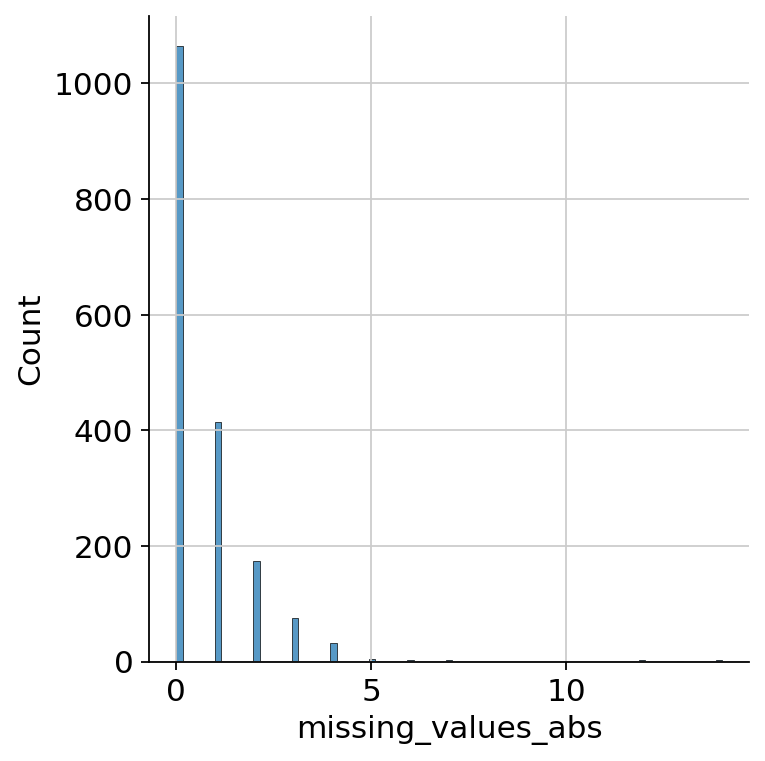

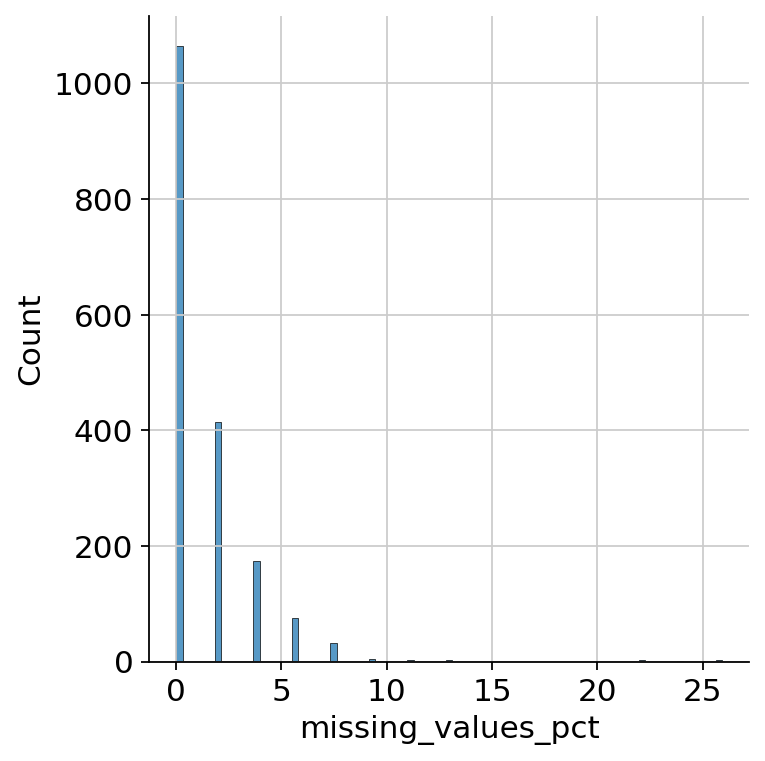

In [12]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])

In [13]:
adata.var

missing_values_abs  missing_values_pct  \
ehrapycat_service_unit_FICU                          0            0.000000   
ehrapycat_service_unit_MICU                          0            0.000000   
ehrapycat_service_unit_SICU                          0            0.000000   
ehrapycat_day_icu_intime_Friday                      0            0.000000   
ehrapycat_day_icu_intime_Monday                      0            0.000000   
ehrapycat_day_icu_intime_Saturday                    0            0.000000   
ehrapycat_day_icu_intime_Sunday                      0            0.000000   
ehrapycat_day_icu_intime_Thursday                    0            0.000000   
ehrapycat_day_icu_intime_Tuesday                     0            0.000000   
ehrapycat_day_icu_intime_Wednesday                   0            0.000000   
aline_flg                                            0            0.000000   
icu_los_day                                          0            0.000000   
hospital_los_day                                     0            0.000000   
age                                                  0            0.000000   
gender_num                                           1            0.056306   
weight_first                                       110            6.193694   
bmi                                                466           26.238739   
sapsi_first                                         85            4.786036   
sofa_first                                           6            0.337838   
service_num                                          0            0.000000   
day_icu_intime_num                                   0            0.000000   
hour_icu_intime                                      0            0.000000   
hosp_exp_flg                                         0            0.000000   
icu_exp_flg                                          0            0.000000   
day_28_flg                                           0            0.000000   
mort_day_censored                                    0            0.000000   
censor_flg                                           0            0.000000   
sepsis_flg                                           0            0.000000   
chf_flg                                              0            0.000000   
afib_flg                                             0            0.000000   
renal_flg                                            0            0.000000   
liver_flg                                            0            0.000000   
copd_flg                                             0            0.000000   
cad_flg                                              0            0.000000   
stroke_flg                                           0            0.000000   
mal_flg                                              0            0.000000   
resp_flg                                             0            0.000000   
map_1st                                              0            0.000000   
hr_1st                                               0            0.000000   
temp_1st                                             3            0.168919   
spo2_1st                                             0            0.000000   
abg_count                                            0            0.000000   
wbc_first                                            8            0.450450   
hgb_first                                            8            0.450450   
platelet_first                                       8            0.450450   
sodium_first                                         5            0.281532   
potassium_first                                      5            0.281532   
tco2_first                                           5            0.281532   
chloride_first                                       5            0.281532   
bun_first                                            5            0.281532   
creatinine_first                                     6    

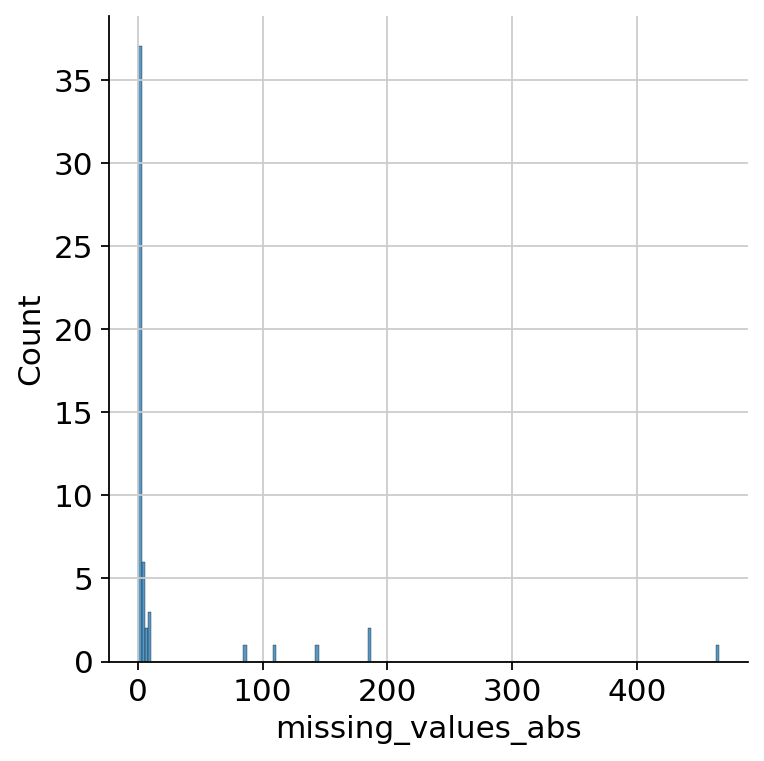

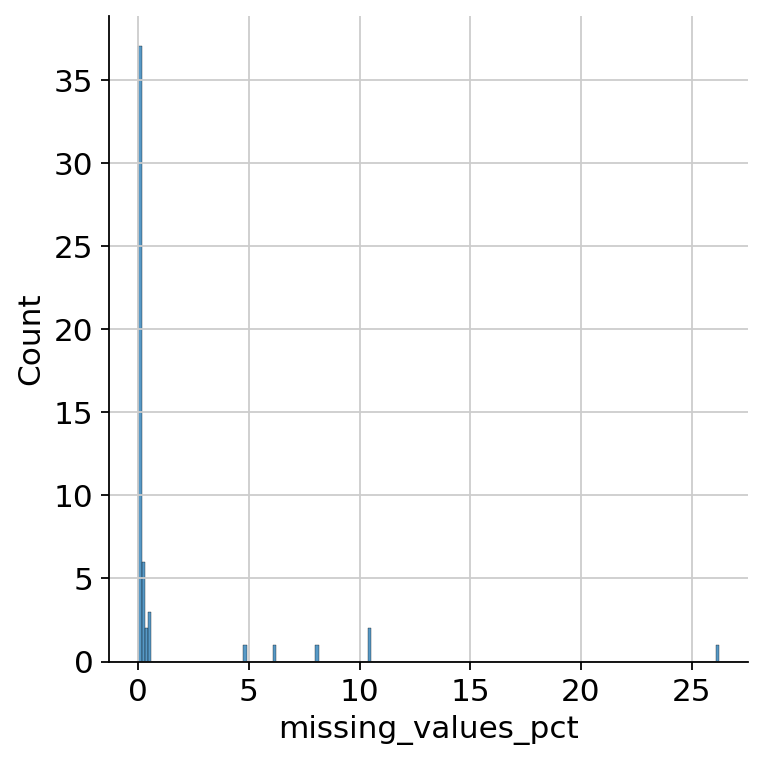

In [14]:
_ = sns.displot(adata.var["missing_values_abs"])
plt.show()

_ = sns.displot(adata.var["missing_values_pct"])

The data still has several features with missing values, but none of them exceed more than 27% (BMI) of percentage of missing values.
Hence, there is no need to drop any of the observations nor features. We can simply impute the missing values.

### Missing Data Imputation

ehrapy offers many options to [impute](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#imputation) missing values in an AnnData object.
Here, we'll use KNN imputation with 5 neighbors (`n_neighbours=5`, the default value).

In [15]:
ep.pp.knn_impute(adata, n_neighbours=5)

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

Output()

We can now confirm that there are indeed no missing values present.

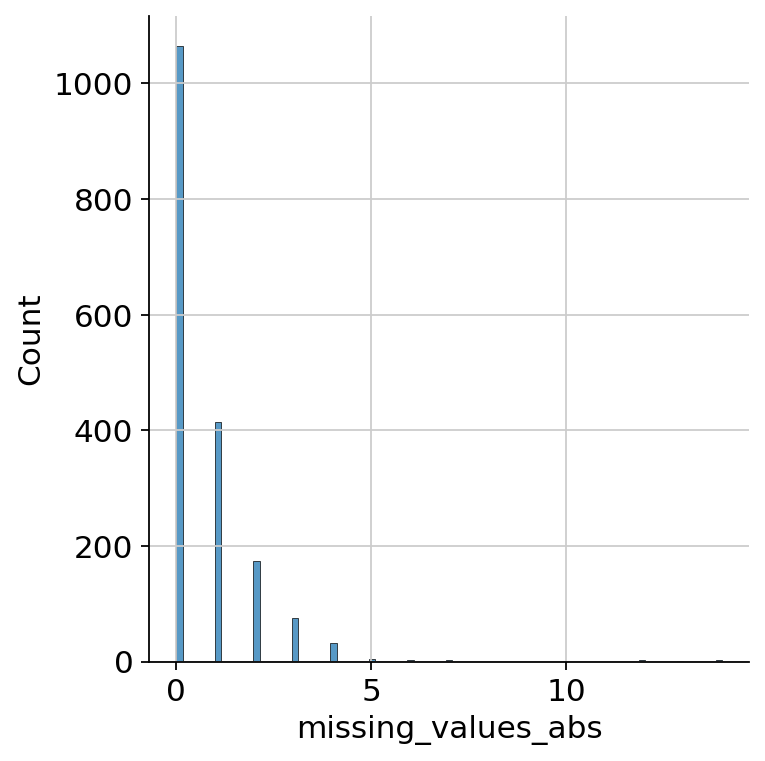

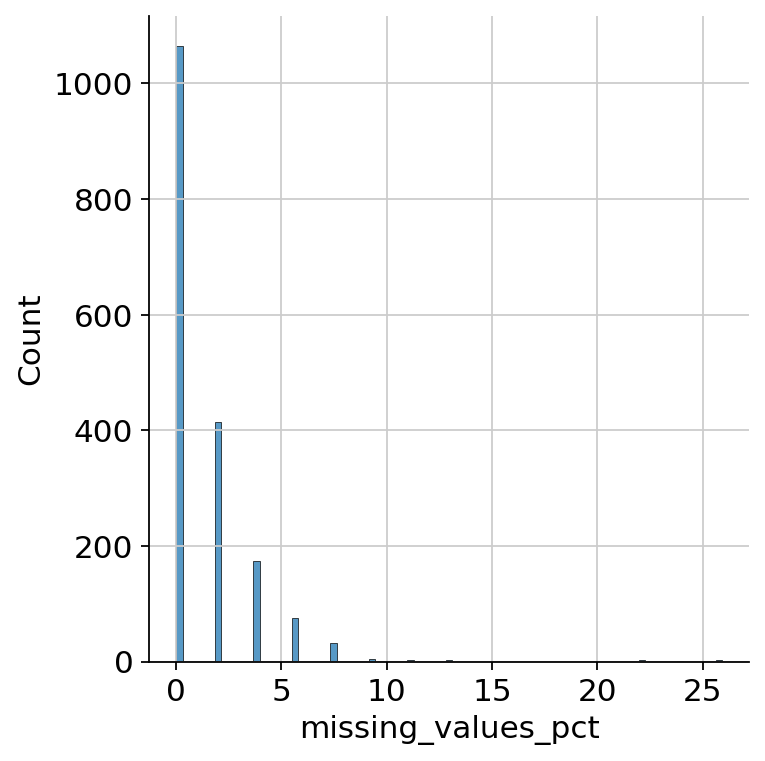

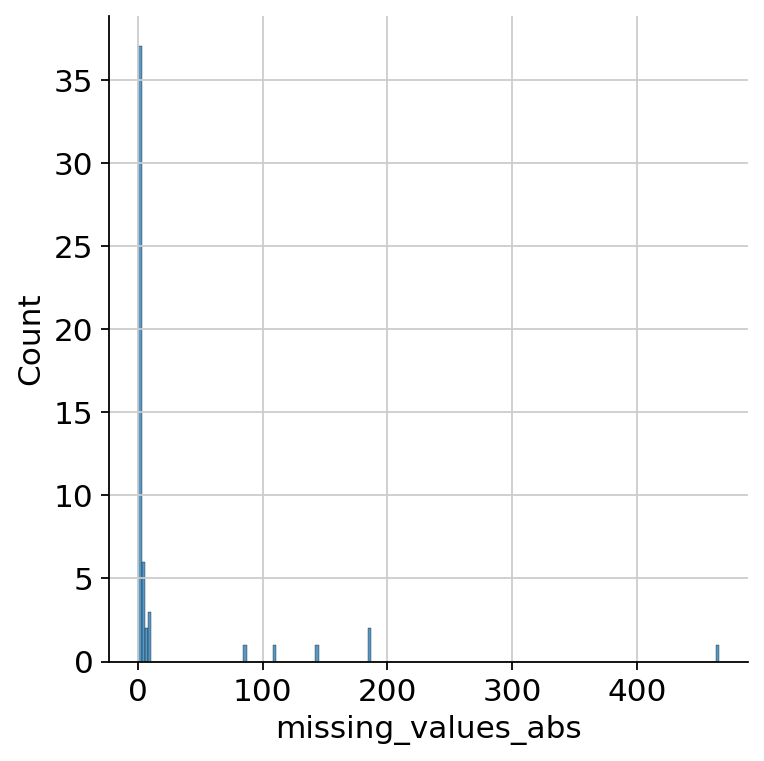

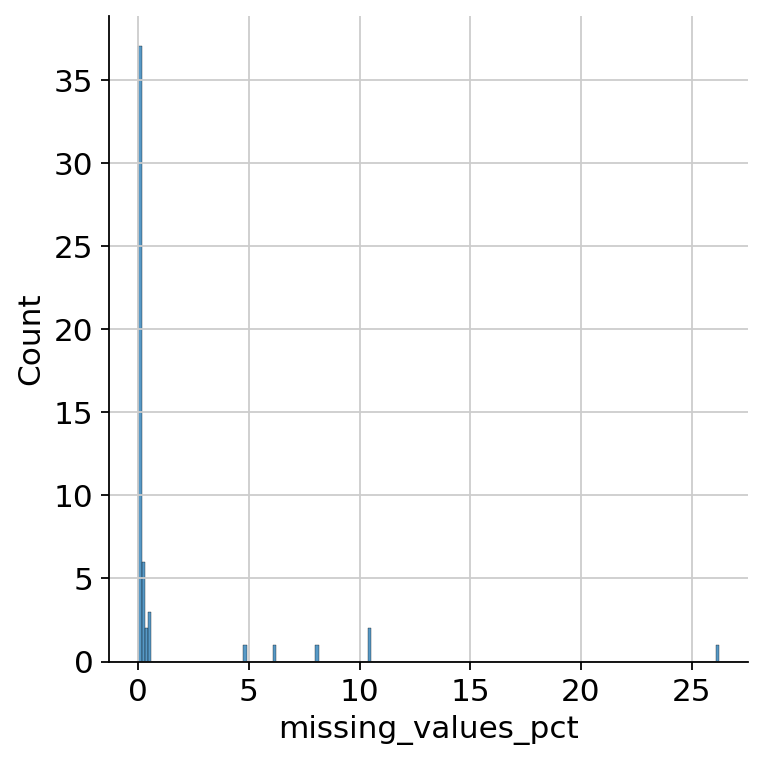

In [16]:
_ = sns.displot(adata.obs["missing_values_abs"])
plt.show()

_ = sns.displot(adata.obs["missing_values_pct"])
plt.show()

_ = sns.displot(adata.var["missing_values_abs"])
plt.show()

_ = sns.displot(adata.var["missing_values_pct"])

### Quality Control - Data Distribution

Depending on the measurement and the unit of a measurement the value ranges of features may be huge.
Clusterings and differential comparisons especially may be greatly influenced by exceptionally big values.

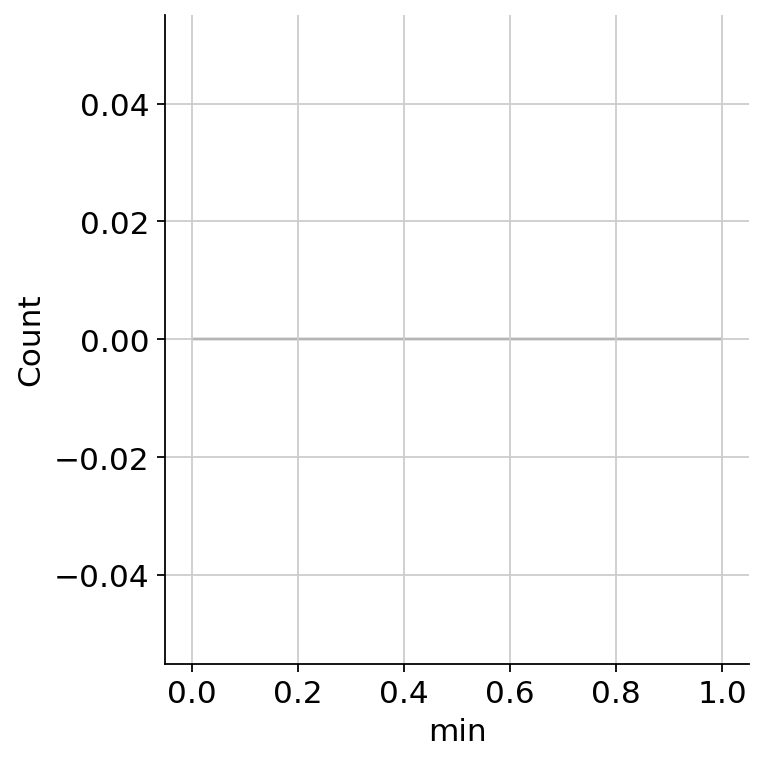

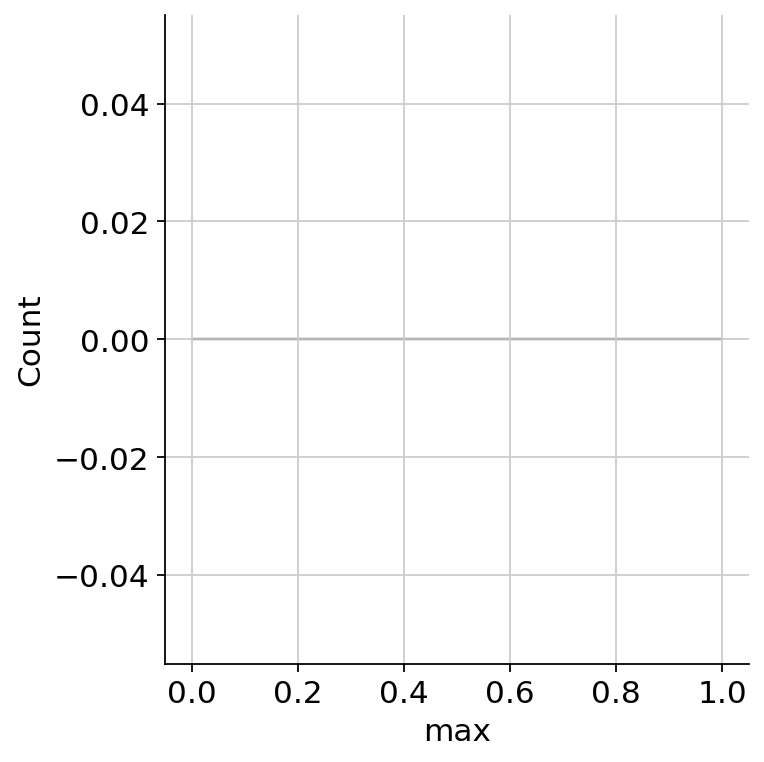

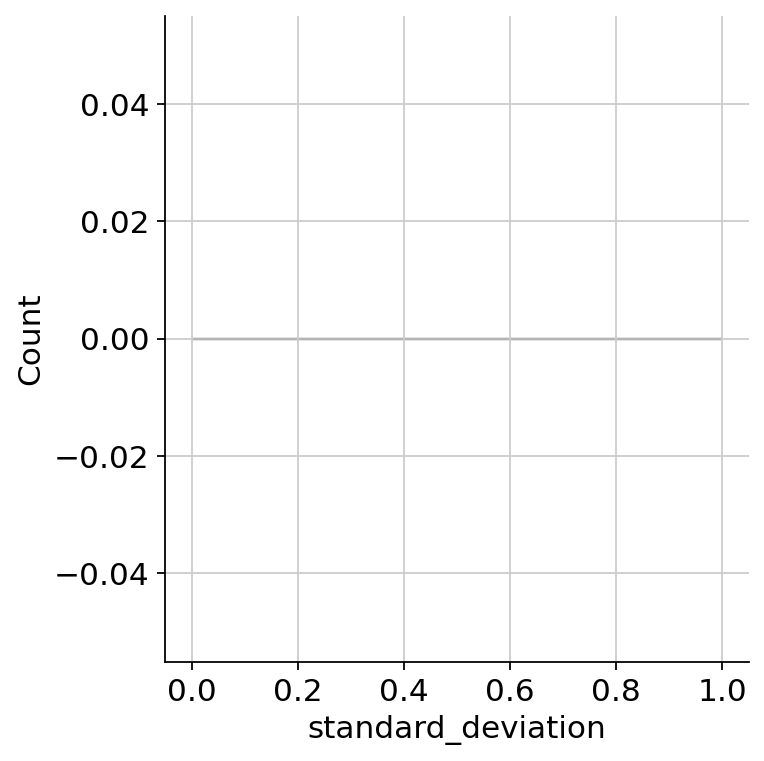

In [17]:
_ = sns.displot(adata.var["min"])
plt.show()

_ = sns.displot(adata.var["max"])
plt.show()

_ = sns.displot(adata.var["standard_deviation"])

In [18]:
adata.var[adata.var["standard_deviation"] > 500]

Empty DataFrame
Columns: [missing_values_abs, missing_values_pct, mean, median, standard_deviation, min, max]
Index: []

The standard deviation of the feature **iv_day_1** is huge together with a very low miniumum value of 0 and a maximum value of 13910.
This feature requires normalization.

## Normalization

ehrapy offers several options to [normalize](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#normalization) data. While it is possible to normalize all numerical values at once with the same normalization function we might be able to get away with just normalizing the `iv_day_1` feature.
log normalization with an offset of 1 to add pseudocounts seems appropriate.

In [19]:
ep.pp.log_norm(adata, vars=["iv_day_1"], offset=1)

2023-04-07 11:49:45,323 - root INFO - Column names for numeric variables ['iv_day_1'] were replaced.


AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime', 'missing_values_abs', 'missing_values_pct'
    var: 'missing_values_abs', 'missing_values_pct', 'mean', 'median', 'standard_deviation', 'min', 'max'
    uns: 'numerical_columns', 'non_numerical_columns', 'encoding_to_var', 'original_values_categoricals', 'var_to_encoding', 'normalization'
    layers: 'original', 'raw_norm'

In [20]:
_ = ep.pp.qc_metrics(adata)
ep.pl.qc_metrics(adata)

TypeError! Setting quality control metrics to nan. Did you encode your data?

2023-04-07 11:49:45,458 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


                                             Ehrapy qc metrics of var                                              
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━┓
┃          Column name ┃ missing_values_abs ┃ missing_values_pct ┃ mean ┃ median ┃ standard_deviation ┃ min ┃ max ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━┩
│ ehrapycat_service_u… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_service_u… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_service_u… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│ ehrapycat_day_icu_i… │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│            aline_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│          icu_los_day │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│     hospital_los_day │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│                  age │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│           gender_num │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│         weight_first │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│                  bmi │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│          sapsi_first │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│           sofa_first │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│          service_num │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│   day_icu_intime_num │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│      hour_icu_intime │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│         hosp_exp_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│          icu_exp_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│           day_28_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│    mort_day_censored │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│           censor_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│           sepsis_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│              chf_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│             afib_flg │                0.0 │                0.0 │  nan │    nan │                nan │ nan │ nan │
│            renal_flg │                0.0 │           

## Dimensionality reduction

As a next step, we reduce the dimensionality of the dataset with [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis).
We also visualize the principal components with ehrapy.

In [21]:
ep.pp.pca(adata)

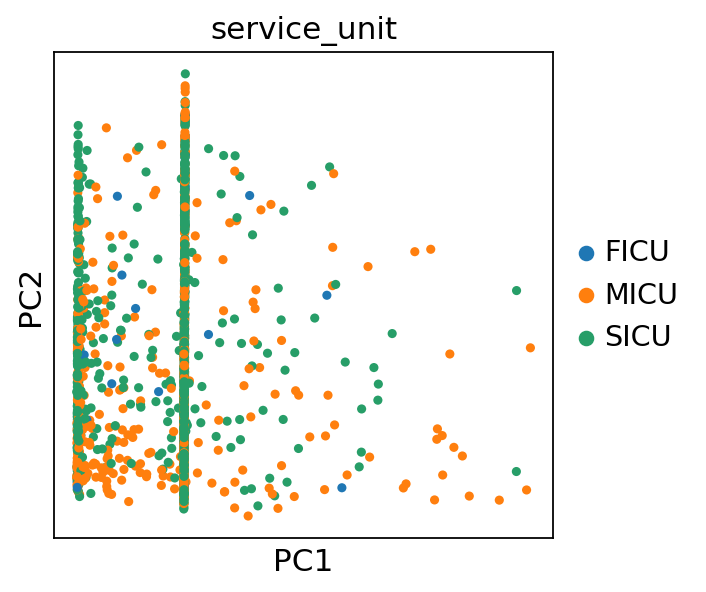

In [22]:
ep.pl.pca(adata, color="service_unit")

The reduced representation can then be used as input for the neighbours graph calculation which serves as the input for advanced embeddings and visualizations like UMAP.

In [23]:
ep.pp.neighbors(adata)

In [24]:
ep.tl.umap(adata)

## Batch effect check

The just calculated UMAP embedding can be visualized with ehrapy to learn more about the data.
For example, we can check whether the day of measurement of the service unit where the measurement was taken has a strong effect on the distribution.

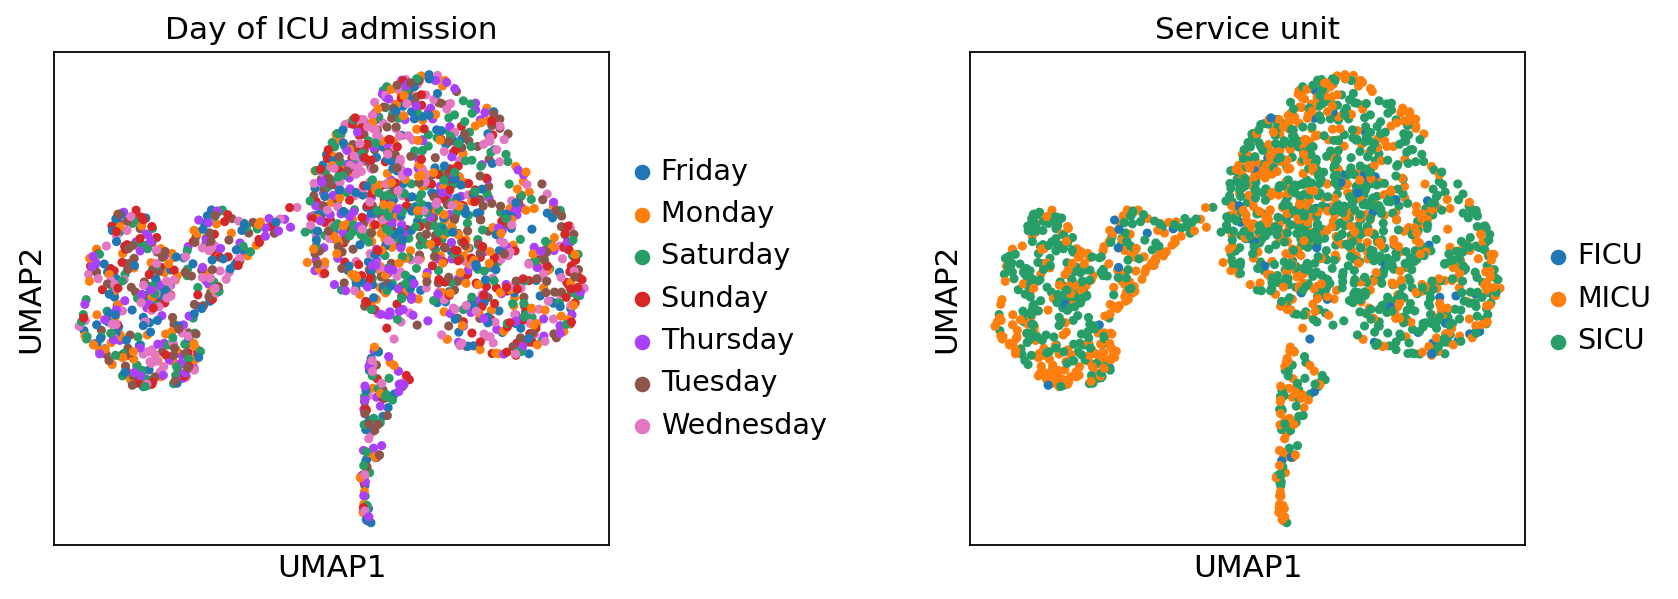

In [25]:
ep.pl.umap(
    adata,
    color=["day_icu_intime", "service_unit"],
    wspace=0.5,
    title=["Day of ICU admission", "Service unit"],
)

The embeddings suggest that there's no strong effect by the aforementioned potential confounders.

## Community detection

To make more sense of the embedding it is often times useful to determine clusters through for example community detection as implemented in the [Leiden algorithm](https://www.nature.com/articles/s41598-019-41695-z).

The implementation in ehrapy allows for the setting of a resolution which determines the number of found clusters. It is often times useful to play around with the parameter.

In [26]:
ep.tl.leiden(adata, resolution=0.3, key_added="leiden_0_3")

The leiden algorithm added a key to `obs` (`leiden_0_3`) that stores the clusters. These can subsequently be visualized in the UMAP embedding.

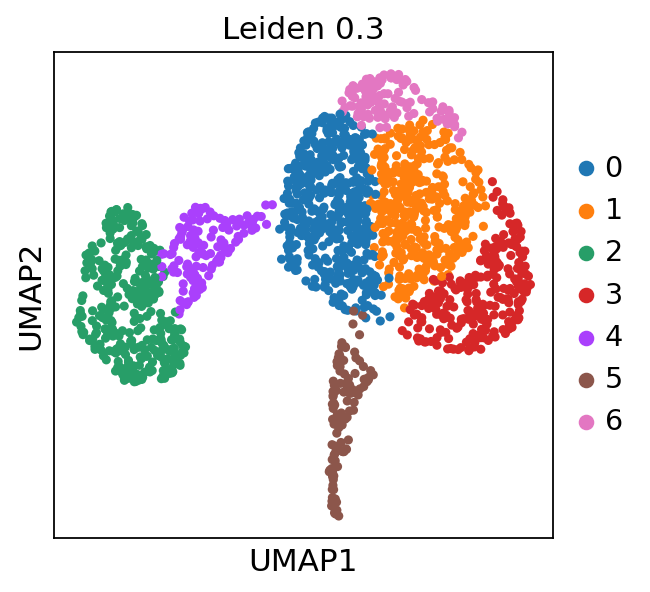

In [27]:
ep.pl.umap(adata, color=["leiden_0_3"], title="Leiden 0.3")

Next, we explore a few groups of features which could be used to annotate the clusters.

## Hospital & ICU statistics

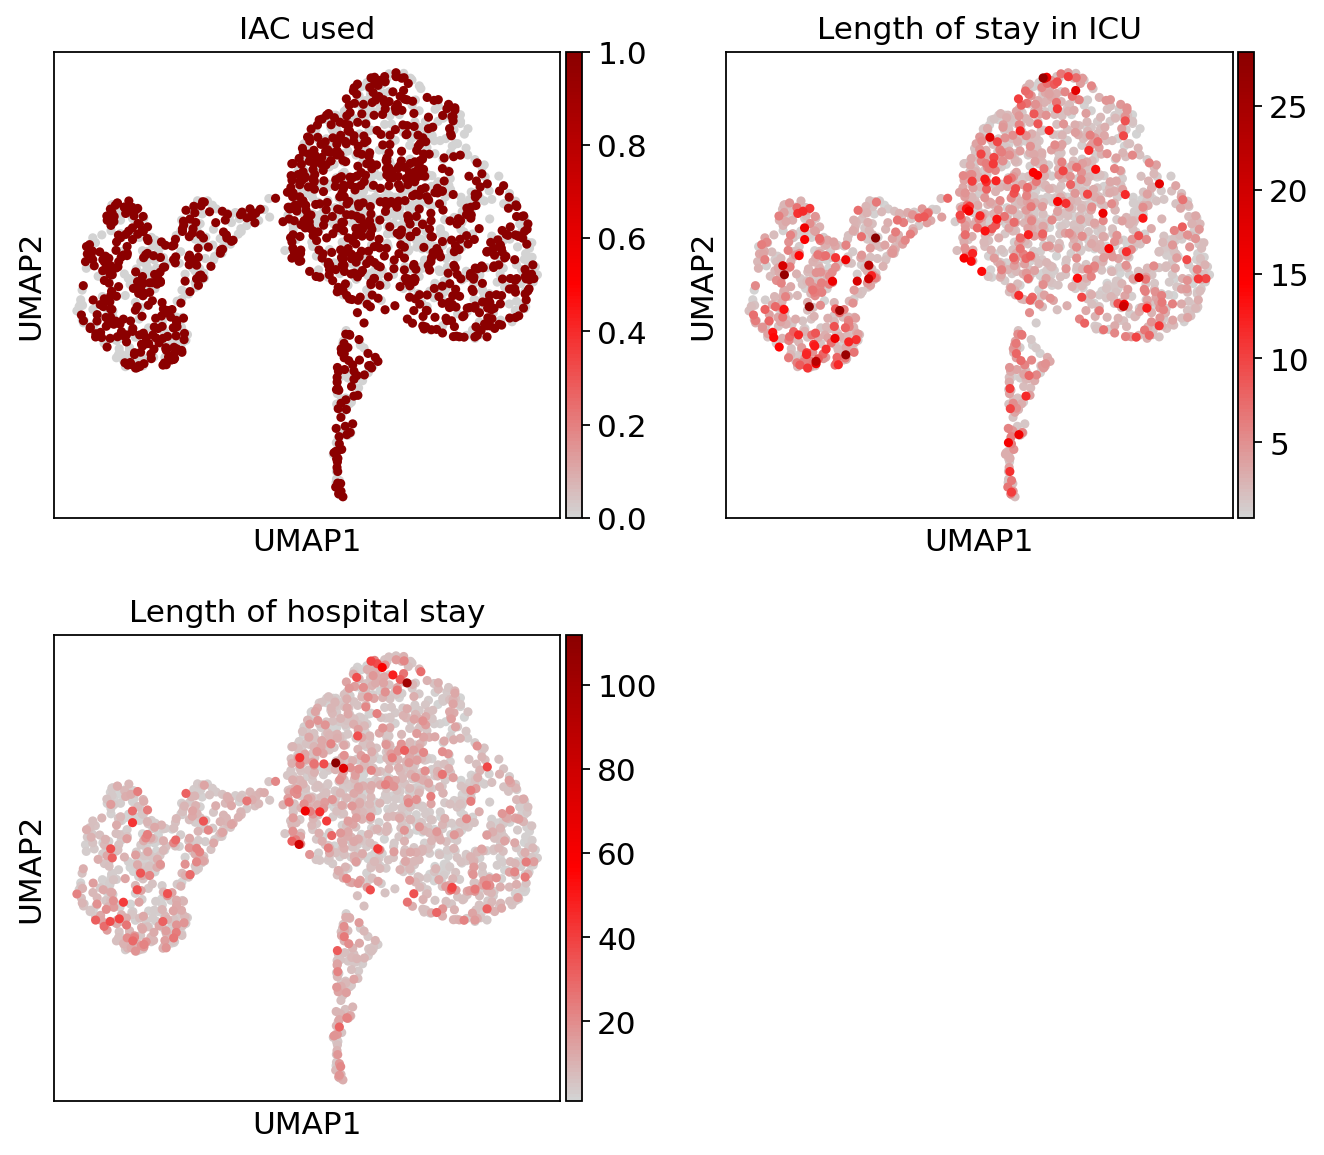

In [28]:
ep.pl.umap(
    adata,
    color=["aline_flg", "icu_los_day", "hospital_los_day"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["IAC used", "Length of stay in ICU", "Length of hospital stay"],
    ncols=2
)

## Death

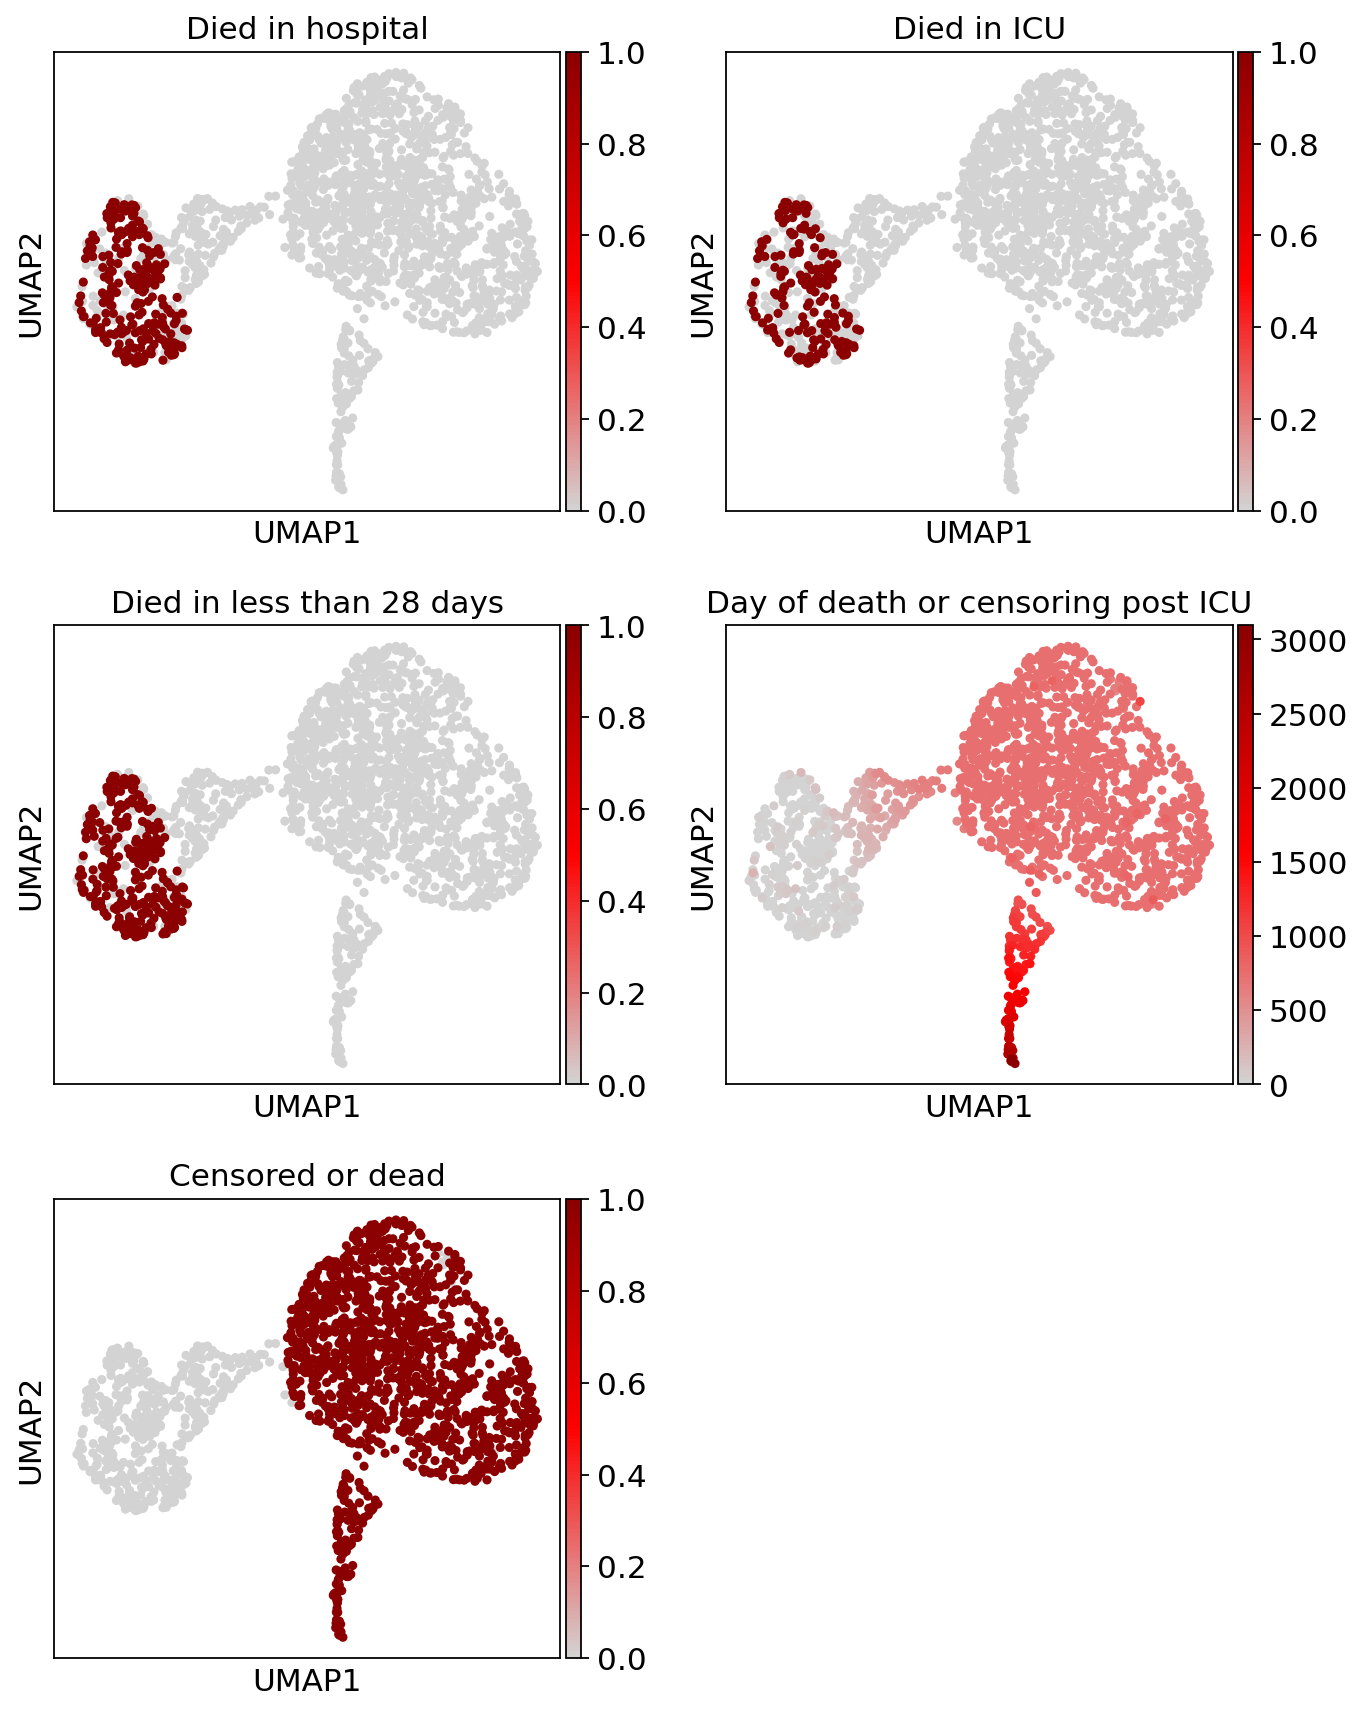

In [29]:
ep.pl.umap(
    adata,
    color=[
        "hosp_exp_flg",
        "icu_exp_flg",
        "day_28_flg",
        "mort_day_censored",
        "censor_flg",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Died in hospital",
        "Died in ICU",
        "Died in less than 28 days",
        "Day of death or censoring post ICU",
        "Censored or dead",
    ],
    ncols=2
)

## Demographics

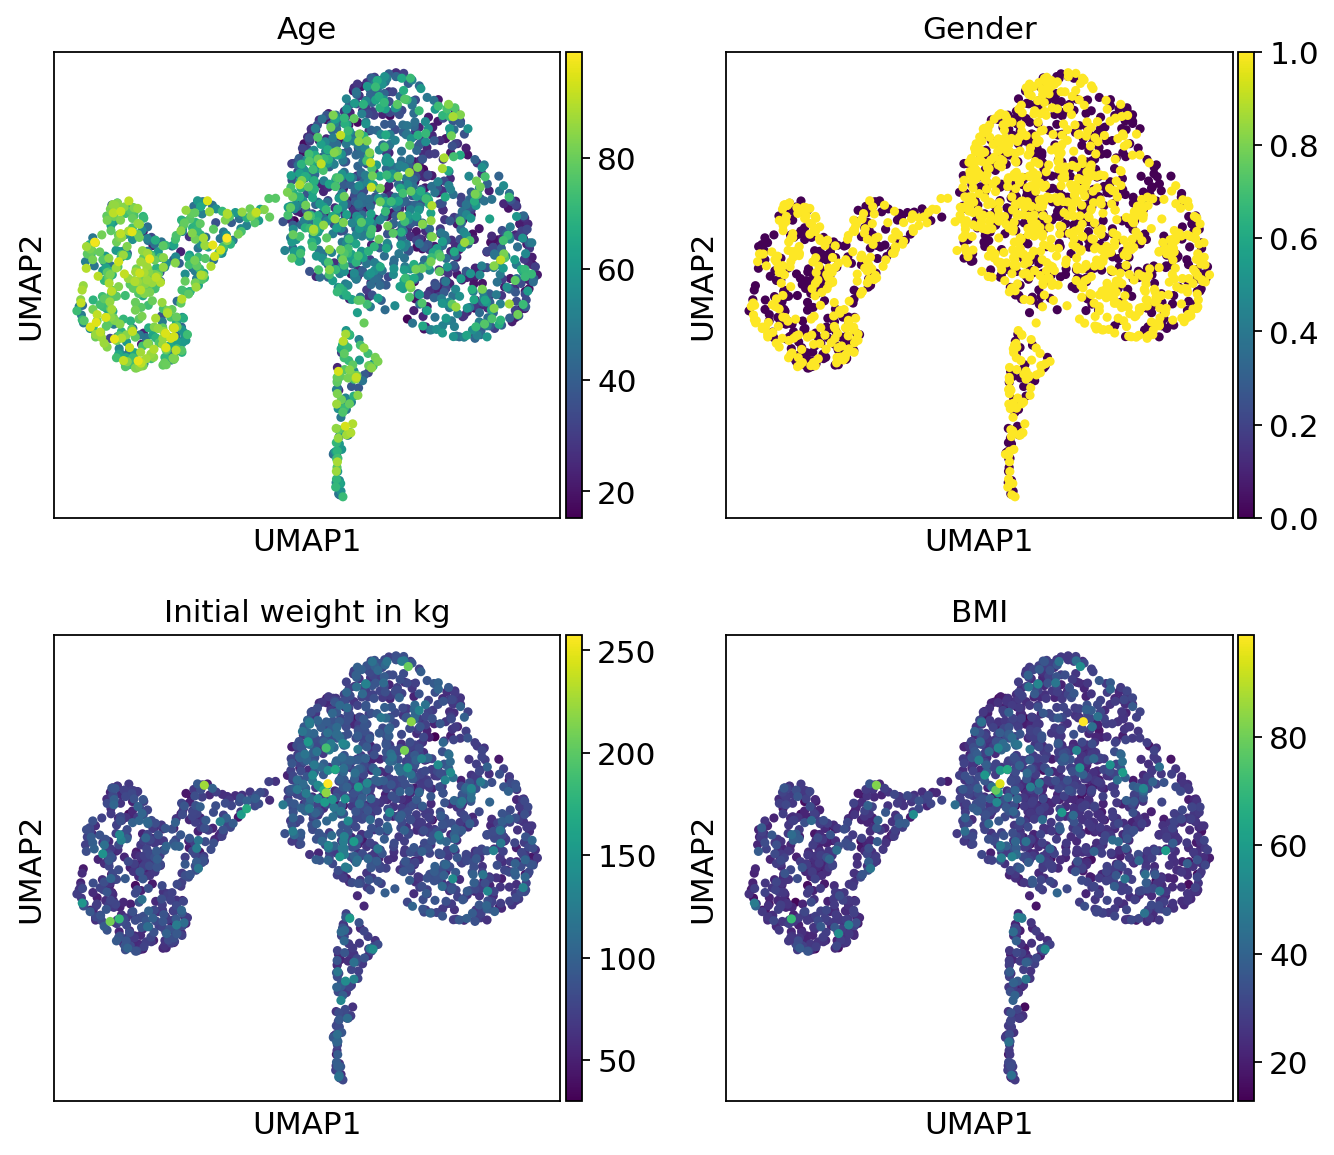

In [30]:
ep.pl.umap(
    adata,
    color=[
        "age",
        "gender_num",
        "weight_first",
        "bmi",
    ],
    title=["Age", "Gender", "Initial weight in kg", "BMI"],
    ncols=2
)

## Comorbidities

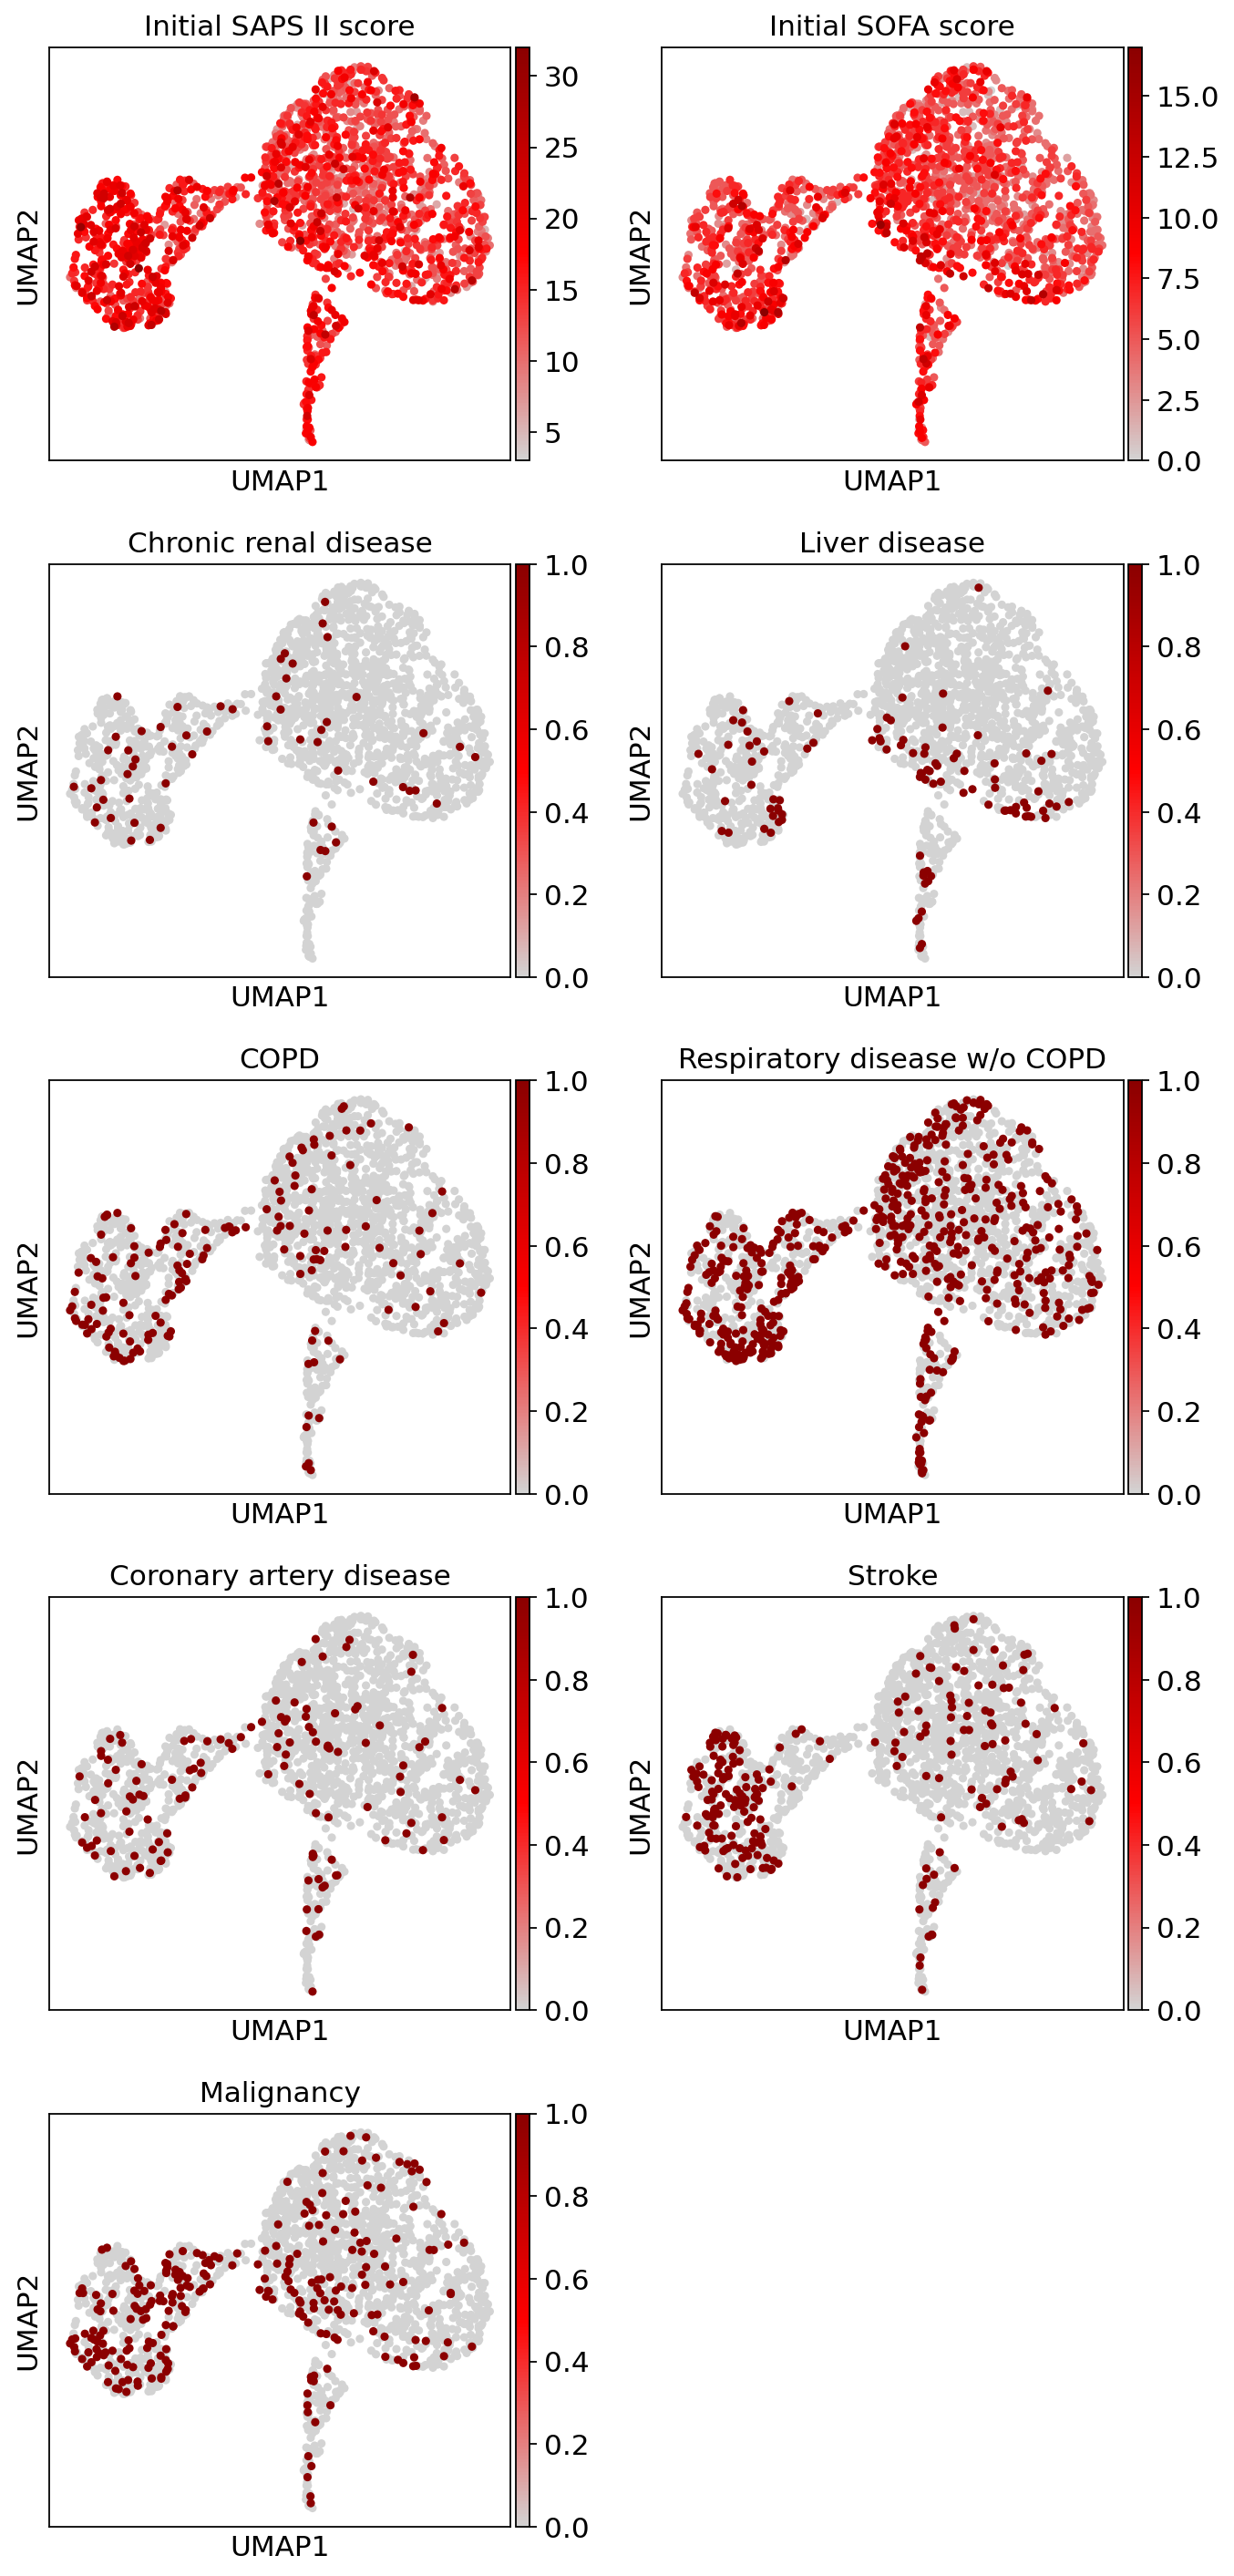

In [31]:
ep.pl.umap(
    adata,
    color=[
        "sapsi_first",
        "sofa_first",
        "renal_flg",
        "liver_flg",
        "copd_flg",
        "resp_flg",
        "cad_flg",
        "stroke_flg",
        "mal_flg",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Initial SAPS II score",
        "Initial SOFA score",
        "Chronic renal disease",
        "Liver disease",
        "COPD",
        "Respiratory disease w/o COPD",
        "Coronary artery disease",
        "Stroke",
        "Malignancy",
    ],
    ncols=2
)

## Initial lab measurements

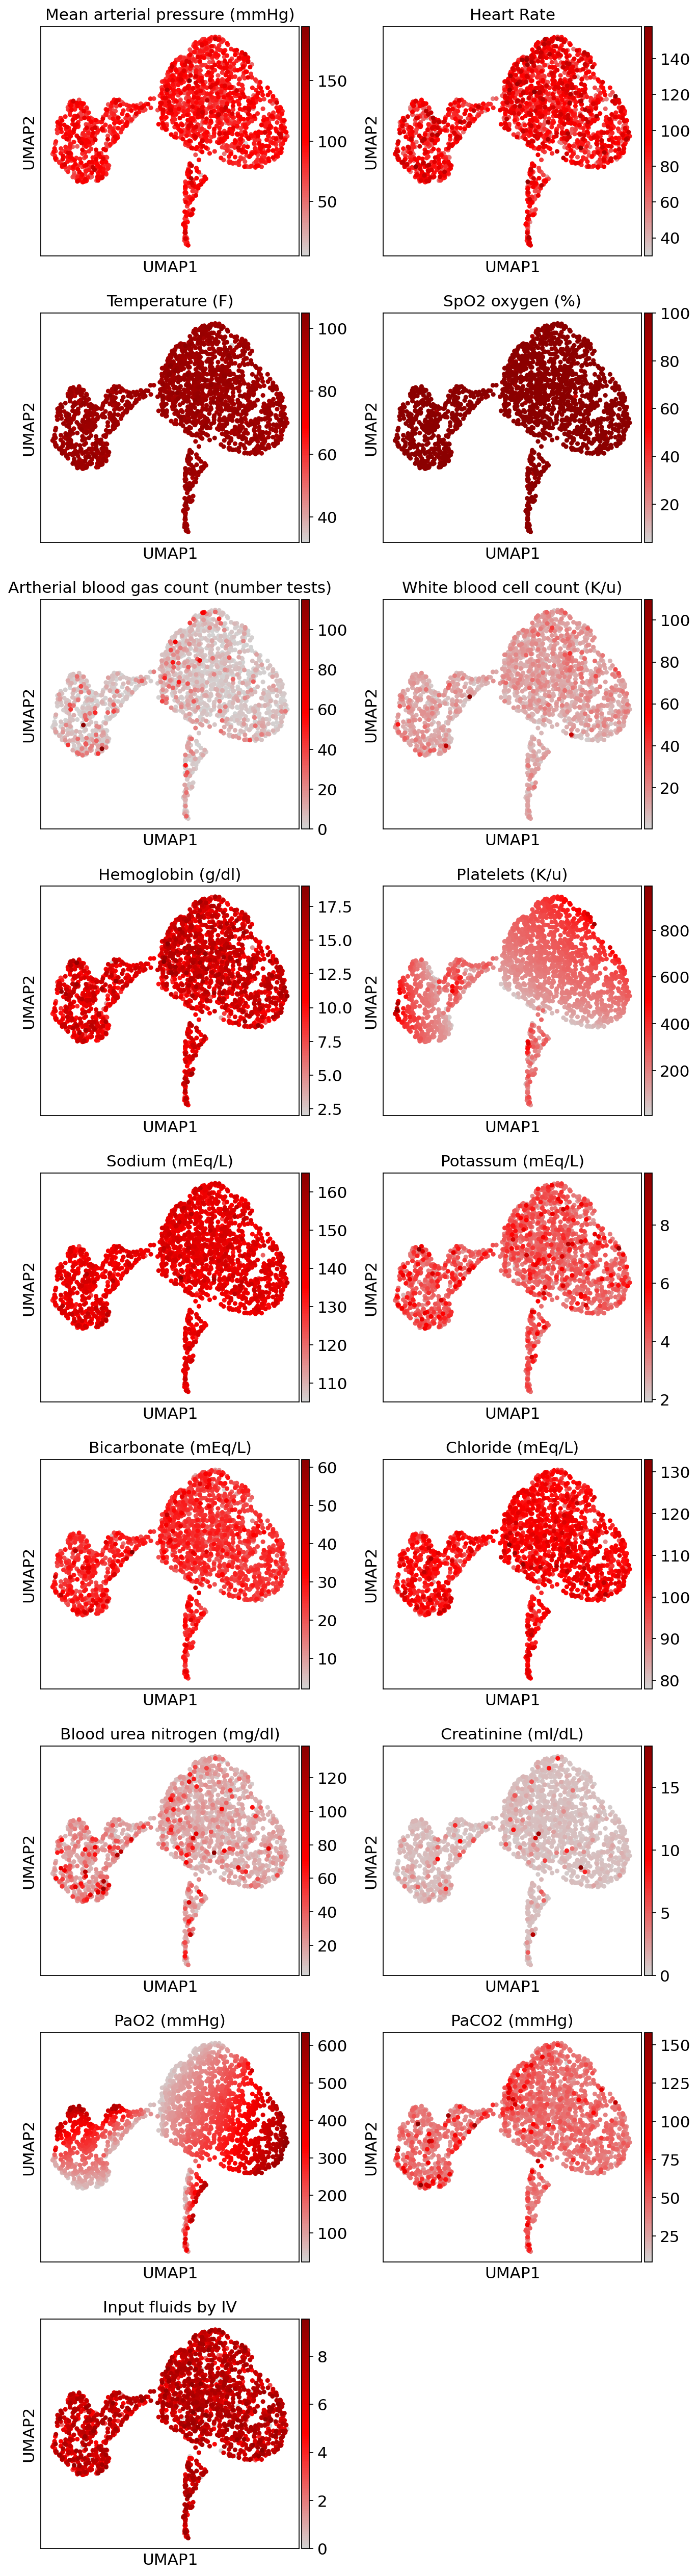

In [32]:
ep.pl.umap(
    adata,
    color=[
        "map_1st",
        "hr_1st",
        "temp_1st",
        "spo2_1st",
        "abg_count",
        "wbc_first",
        "hgb_first",
        "platelet_first",
        "sodium_first",
        "potassium_first",
        "tco2_first",
        "chloride_first",
        "bun_first",
        "creatinine_first",
        "po2_first",
        "pco2_first",
        "iv_day_1",
    ],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=[
        "Mean arterial pressure (mmHg)",
        "Heart Rate",
        "Temperature (F)",
        "SpO2 oxygen (%)",
        "Artherial blood gas count (number tests)",
        "White blood cell count (K/u)",
        "Hemoglobin (g/dl)",
        "Platelets (K/u)",
        "Sodium (mEq/L)",
        "Potassum (mEq/L)",
        "Bicarbonate (mEq/L)",
        "Chloride (mEq/L)",
        "Blood urea nitrogen (mg/dl)",
        "Creatinine (ml/dL)",
        "PaO2 (mmHg)",
        "PaCO2 (mmHg)",
        "Input fluids by IV",
    ],
    ncols=2
)

## Annotation

To annotate the clusters, ehrapy provides `ep.tl.rank_features_groups` which allows for simple t-tests between the cluster groups to determine significantly enriched or lowered values.

In [34]:
ep.tl.rank_features_groups(adata, groupby="leiden_0_3")

/home/zeth/miniconda3/envs/ehrapy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/zeth/miniconda3/envs/ehrapy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/zeth/miniconda3/envs/ehrapy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/zeth/miniconda3/envs/ehrapy/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) +

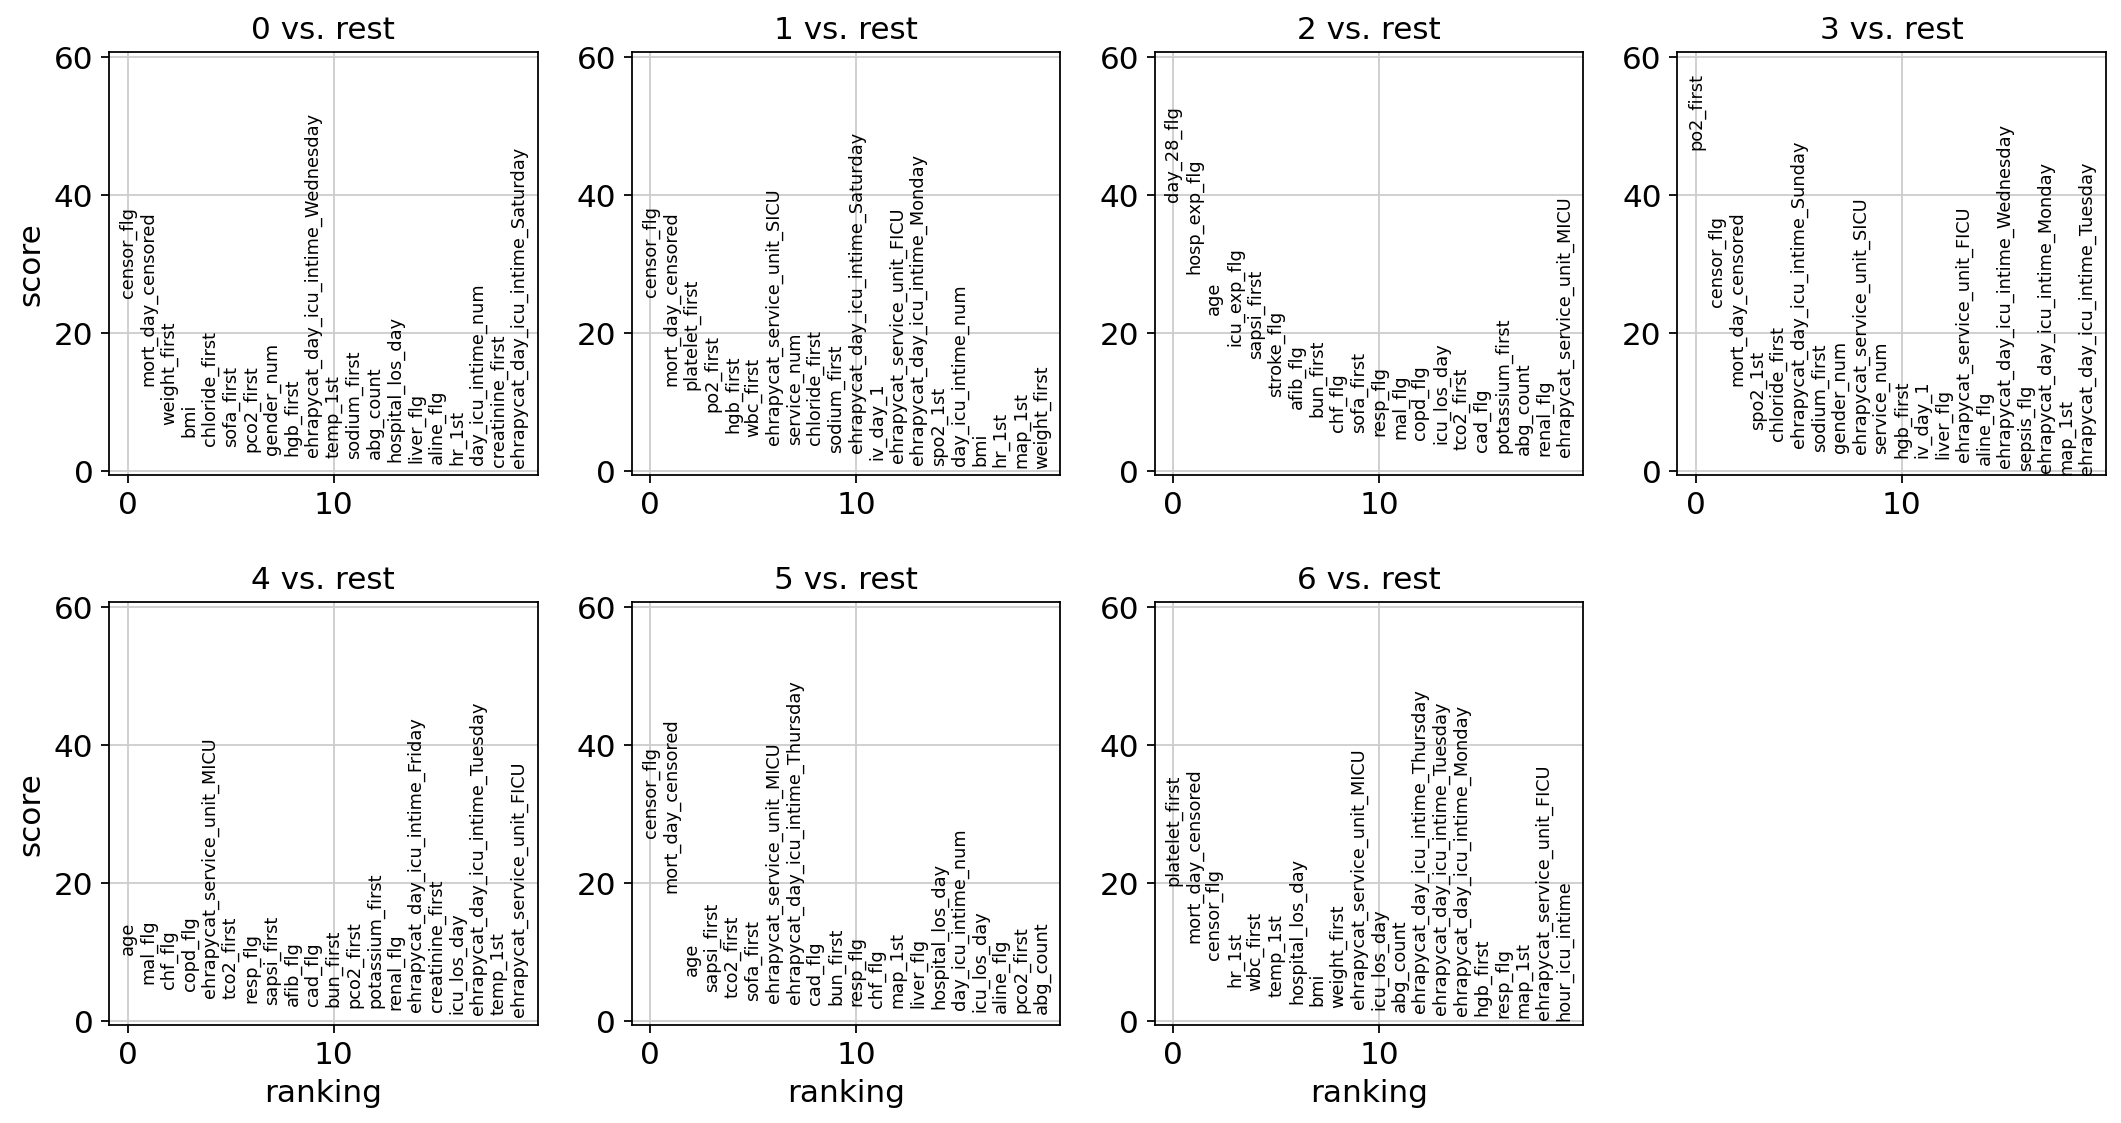

In [35]:
ep.pl.rank_features_groups(adata, key="rank_features_groups")

This knowledge together with the UMAP plots from above allows us to annotate the clusters.

In [36]:
adata.obs["annotation"] = "NA"

In [37]:
annotation = {
    "0": "weight+",
    "1": "platelet+",
    "2": "age+/los+/death+",
    "3": "resp+",
    "4": "age+/comorbidity+",
    "5": "age+/sepsis+",
    "6": "heart rate+"
}

In [39]:
adata.obs["annotation"] = [
    annotation[l] if l in annotation.keys() else l for l in adata.obs["leiden_0_3"]
]

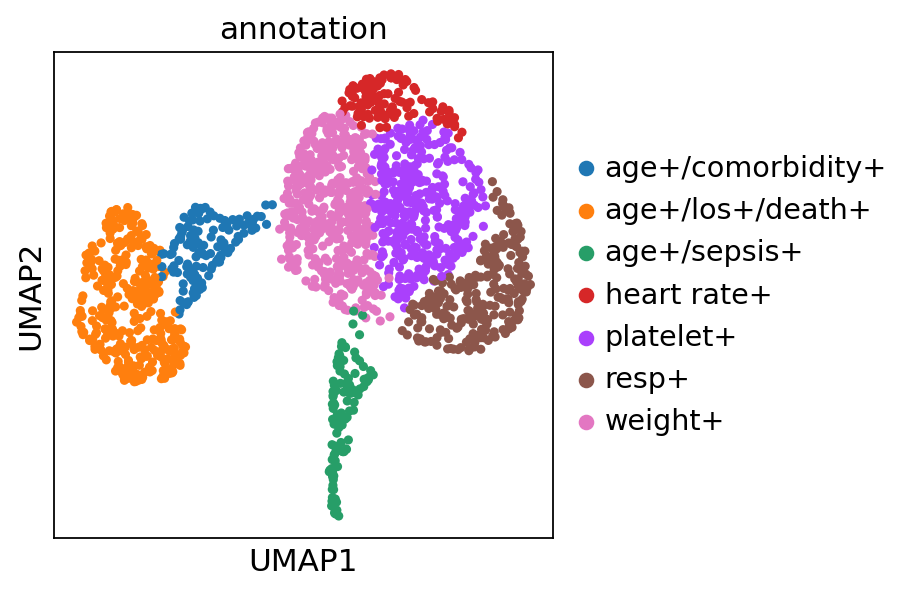

In [40]:
ep.pl.umap(adata, color="annotation")

## Paga 

It might also be of interest to infer trajectories to learn about dynamic processes and stage transitions.
ehrapy offers several [trajectory inference](https://ehrapy.readthedocs.io/en/latest/usage/usage.html#clustering-and-trajectory-inference) algorithms for this purpose.

In [41]:
ep.tl.paga(adata, groups="leiden_0_3")

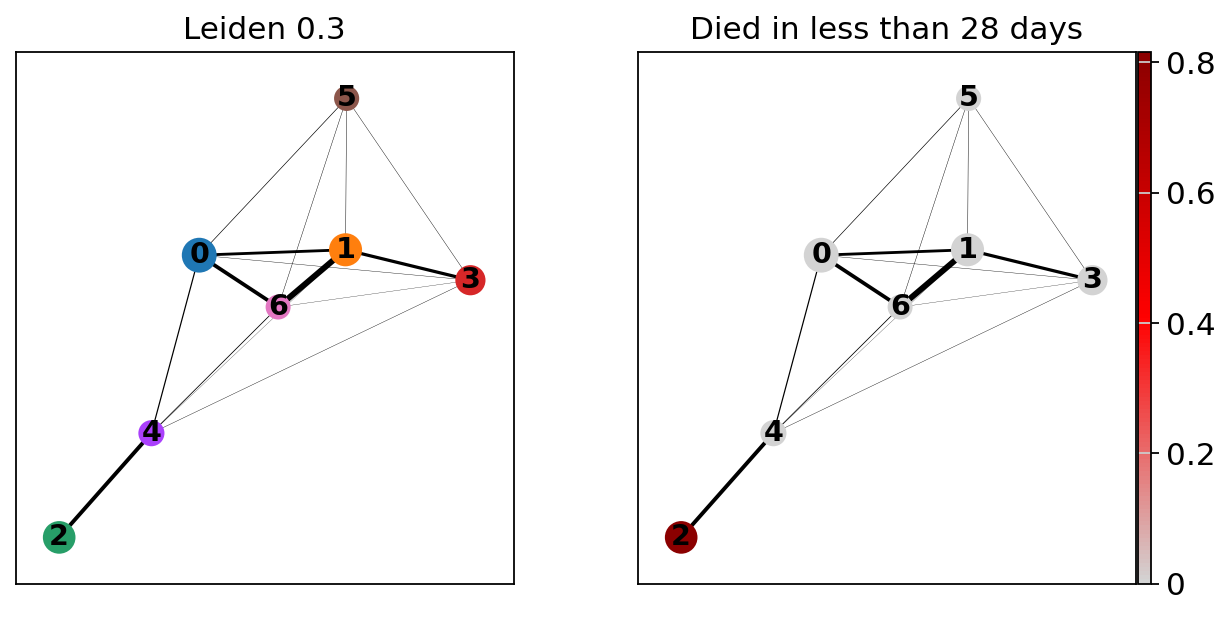

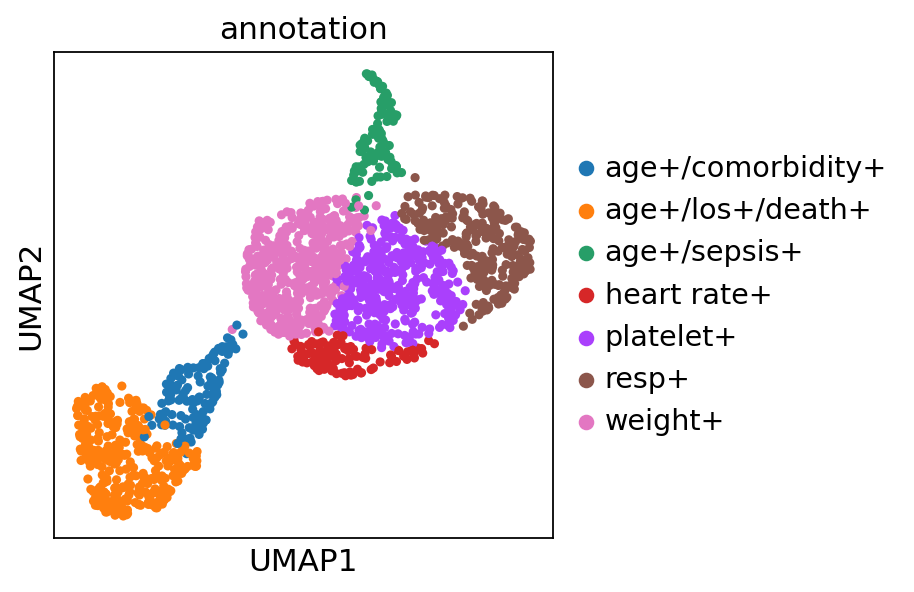

In [42]:
ep.pl.paga(
    adata,
    color=["leiden_0_3", "day_28_flg"],
    cmap=ep.pl.Colormaps.grey_red.value,
    title=["Leiden 0.3", "Died in less than 28 days"],
)

ep.tl.umap(adata, init_pos="paga")
ep.pl.umap(adata, color=["annotation"])

In [43]:
ep.tl.draw_graph(adata, init_pos="paga")

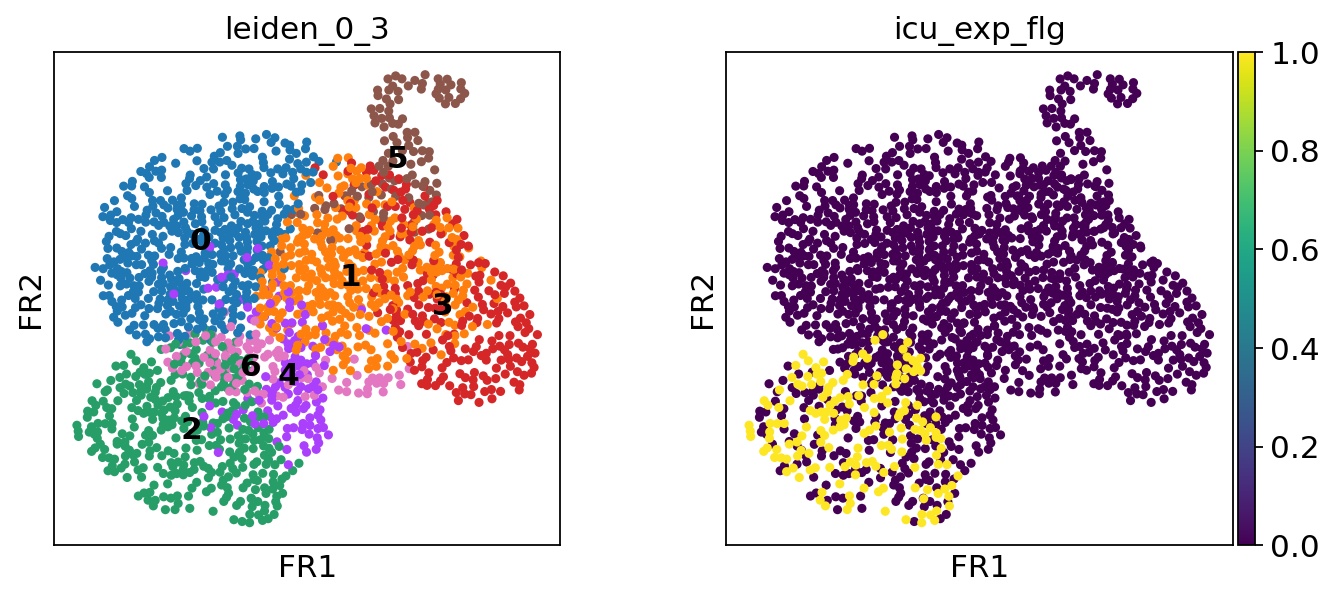

In [44]:
ep.pl.draw_graph(adata, color=["leiden_0_3", "icu_exp_flg"], legend_loc="on data")

## Writing the results into a file

We save all of our computations and our final state into an `.h5ad` file. It can then be read again like `ep.io.read("mimic_2.h5ad", adata)`

In [ ]:
ep.io.write("mimic_2.h5ad", adata)